<a href="https://colab.research.google.com/github/virb30/airbnb-lisboa/blob/main/Projeto_Analisando_os_Dados_do_Airbnb_Grande_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Grande Lisboa*
*by [Vinicius Bôscoa](https://viniboscoa.dev)*
<br><br>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à Grande Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Destino: Lisboa

<figure align="center">
  <img src="https://images.unsplash.com/photo-1606215767711-263080a6b4b9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2700&q=80" height="300px" alt="Torre de Belém"/>
  <figcaption>Torre de Belém - Portugal</figcaption>
</figure>

O turismo em Portugal está na moda, e nada melhor do que começar um passeio pelo país pela sua capital, Lisboa.

O clima em Lisboa é agradável o ano todo, mas as melhores épocas para visitá-la são na primavera e no outono, quando as temperaturas são amenas e não costuma chover. Os meses de verão podem ser bem quentes, principalmente em agosto, período de férias escolares na Europa, quando alguns estabelecimentos podem permanecer fechados. O inverno costuma ser chuvoso ainda que raramente atinja temperaturas abaixo de 0<sup>o</sup>C.

Esse cenário climático faz com que as Praias tornem-se a atração preferida dos turistas. Além disso os pontos históricos, a gastronomia e os jardins são passeios que valem a pena.

Com tantas opções de passeio o deslocamento também é um aspecto a ser considerado. Felizmente circular por Lisboa é muito fácil e agradável, partindo do centro da cidade, boa parte das atrações pode ser alcançada a pé, os passeios mais distantes podem ser alcançados utilizando os Metros, eléctricos (bondes) e autocarros (ônibus), que são opções acessíveis, além dos tradicionais: Táxi, Uber e afins.

Com todas essas facilidades, onde se hospedar passa a ser uma questão de escolher como curtir a cidade e não uma busca estratégica visando o itinerário.

### Características geográficas

Antes de começarmos nossa análise, é importante que conheçamos brevemente as características da cidade e do conjunto de dados que estamos utilizando.

Semelhante ao que ocorre com a Grande São Paulo no Brasil - que é composta de vários municípios -, Lisboa (Distrito de Lisboa ou Grande Lisboa) também é composta por mais de um munícipio - denominados conselhos. São eles: 
1. Alenquer, 
2. Amadora, 
3. Arruda dos Vinho, 
4. Azambuja, 
5. Cadaval, 
6. Cascais, 
7. Lisboa, 
8. Loures, 
9. Lourinhã, 
10. Mafra, 
11. Odivelas, 
12. Oeiras, 
13. Sintra, 
14. Sobral de Monte Agraço, 
15. Torres Vedras e 
16. Vila Franca de Xira.


### Airbnb em Portugal

Em Portugal, para um anfitrião anunciar um imóvel do tipo Alojamento Local (casas, apartamentos ou alojamentos) para aluguéis de curta duração é necessário que seja feito um registro no Portal Cidadão. Esse registro deve ser feito para todos os anúncios do Airbnb em Portugal.

## Obtenção dos Dados

Os dados estão disponíveis no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa análise utilizamos o arquivo `listings.csv` que contém informações resumidas e métricas para a cidade de lisboa.

Como o portal está em constante evolução, existe a possibilidade do conjunto de dados que utilizamos não estar disponível, ou ter sofrido alterações em sua estrutura, o que quebraria nossa análise. 

Pensando nisso, disponibilizamos o conjunto de dados utilizado nessa análise [aqui](https://drive.google.com/u/0/uc?id=1tS_amtElDIVF918jAeQgSqrEZnBGATv2&export=download).

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
DATASET = 'https://drive.google.com/u/0/uc?id=1tS_amtElDIVF918jAeQgSqrEZnBGATv2&export=download'

# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv(DATASET)

# ver quantidade de registros
df.shape

(19458, 16)

## Análise dos Dados

Nessa etapa iremos entender como os dados estão estruturados e quais características nos chamam mais atenção.

Segundo sua documentação as variáveis estão divididas da seguinte maneira:

**Dicionário das variáveis**

* `id` - identificador único do airbnb
* `name` - descrição do imóvel
* `host_id` - código do proprietário (anfitrião) do imóvel
* `host_name` - nome do anfitrião
* `neighbourhood_group` - grupo do bairro (em nosso caso representa o conselho)
* `neighbourhood` - nome do bairro
* `latitude` - latitude do imóvel
* `longitude` - longitude do imóvel
* `room_type` - tipo de quarto
* `price` - preço da diária em moeda local (no caso, euros)
* `minimum_nights` - número mínimo de noites
* `number_of_reviews` - quantidade de reviews
* `last_review` - data da última review
* `reviews_per_month` - média de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do host na mesma região
* `availability_365` - quantidade de dias disponíveis nos próximos 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.32,1,83
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,2019-11-08,1.30,1,305
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2019-10-29,2.77,1,143
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,53,2,274,2020-11-26,2.74,1,303
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,55,2020-03-11,0.84,1,349


Também é interessante verificarmos quais valores únicos a variável neighbourhood_group possui.

In [5]:
# verificar valores únicos de neighbourhood_groups
df.neighbourhood_group.unique()

array(['Lisboa', 'Cascais', 'Sintra', 'Alenquer', 'Vila Franca De Xira',
       'Mafra', 'Torres Vedras', 'Lourinh', 'Oeiras', 'Cadaval',
       'Amadora', 'Arruda Dos Vinhos', 'Loures', 'Odivelas', 'Azambuja',
       'Sobral De Monte Agrao'], dtype=object)

Conforme dissemos anteriormente, o Distrito de Lisboa é composto por 16 munícipios, o que nos leva à conclusão de que os dados contidos nesse *Dataset* referem-se à Grande Lisboa e não somente à cidade-capital Lisboa.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


O arquivo que importamos possui 19458 registros e 16 variáveis. Vale ressaltar que o `listings.csv` é uma versão "resumida" dos dados do Airbnb. A versão completa `listings.csv.gz` - que possui 106 variáveis - também está disponível no portal Inside Airbnb.

In [6]:
# identificar o volume de dados do DataFrame
print(f'Registros:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Registros:	19458
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Verificando o percentual de dados ausentes em nosso dataset, podemos perceber que:

* Temos 18% de dados ausentes nos campos de review (`reviews_per_month` e `last_review`);
* A variável `host_name` possui pouco mais de 0,1% de valores ausentes e
* A variável `name` possui 0,05% de valores ausentes.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.183626
last_review                       0.183626
host_name                         0.001079
name                              0.000514
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Verificando a distribuição das variáveis, podemos ver que temos alguns *outliers* para as variáveis `price`e `minimum_nights`. 

Esses *outliers* podem ser tanto valores reais quanto erros de digitação e serão tratados mais adiante.

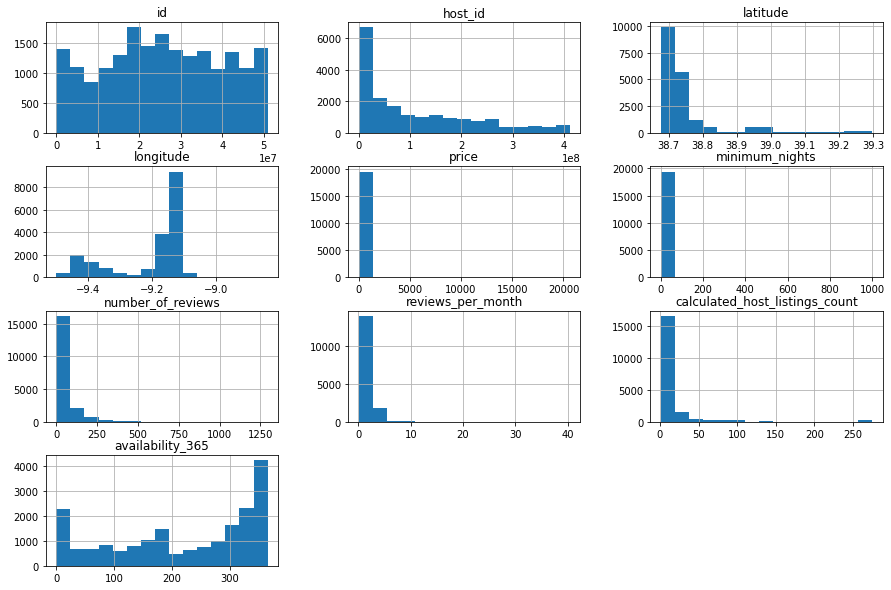

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Podemos ver que a média dos preços de aluguel é &euro; 108,00. No entanto, pelos histogramas, também identificamos outliers para essa variável.
Esses outliers podem ser tanto erros quanto realmente um valor real, porém fora do comum, e que atrapalha nossa análise.


In [9]:
# descrever variáveis numéricas relevantes
df[['price', 'minimum_nights', 'availability_365']].describe()

,price,minimum_nights,availability_365
count,19458.000000,19458.000000,19458.000000
mean,108.296022,3.850396,218.978878
std,281.433465,16.737444,125.645147
min,0.000000,1.000000,0.000000
25%,50.000000,1.000000,113.000000
50%,72.000000,2.000000,251.000000
75%,110.000000,3.000000,335.000000
max,20628.000000,1000.000000,365.000000


Além disso, pelo resumo acima vemos que:

* a variável `price` possui 75% dos valores abaixo de 110,00. porém seu valor máximo é &euro; 20628,00.
* a variável `minimum_nights` possui valores acima de 365 dias

Iremos realizar a limpeza desses outliers e depois verificaremos novamente qual é a média do preço dos aluguéis.

### Limpeza dos dados

Antes de prosseguirmos, iremos realizar um tratamento nos dados para identificar e remover os *outliers* - pontos "fora da curva" - que podem atrapalhar nossa análise.

Nesse projeto as variáveis de interesse são `price` e `minimum_nights`, portanto iremos remover os *outliers* delas.



#### Identificar ponto de corte de `price`

Para definirmos os limites da variável `price` iremos aplicar a técnica do IQR Score, que consiste na subtração do terceiro quartil (75%) pelo primeiro quartil(25%):

$$
  IQR = Q3-Q1
$$


Para determinarmos os limites superior e inferior utilizamos os cálculos:


$$
sup = Q3 + (1,5*IQR)
$$

$$
inf = Q1 - (1,5*IQR)
$$

In [40]:
# calcular IQR de price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR price: {}'.format(IQR_price))

# limites de price
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price
print(f'Limite superior de price: {sup_price}')
print(f'Limite inferior de price: {inf_price}')

IQR price: 60.0
Limite superior de price: 200.0
Limite inferior de price: -40.0


Verificando a distribuição de `price`

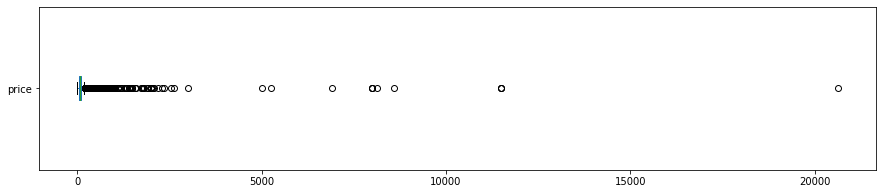

price: valores acima de 200:
1573 entradas
8.0841%


In [41]:
# plotar boxplot para price
df.price.plot(kind="box", vert=False, figsize=(15,3));
plt.show()
# ver quantidade de valores acima de 200
print("price: valores acima de 200:")
print("{} entradas".format(len(df[df.price > 200.0])))
print("{:.4f}%".format((len(df[df.price > 200.0]) / df.shape[0]) * 100))

Podemos ver que valores de `price`acima de &euro; 200 representam menos de 8% do dataset, portanto utilizaremos esse valor como corte. Também eliminaremos os valores de `price` que são iguais a zero.

#### Identificar outliers de `minimum_nights`

Repetiremos o processo da variável `price` para a variável `minimum_nights`.

In [38]:
# calcular IQR de minimum_nights
q1_min_nights = df.minimum_nights.quantile(.25)
q3_min_nights = df.minimum_nights.quantile(.75)
IQR_min_nights = q3_min_nights - q1_min_nights
print('IQR minimum_nights: {}'.format(IQR_min_nights))

# limites de price
sup_min_nights = q3_min_nights + 1.5 * IQR_min_nights
inf_min_nights = q1_min_nights - 1.5 * IQR_min_nights
print(f'Limite superior de minimum_nights: {sup_min_nights}')
print(f'Limite inferior de minimum_nights: {inf_min_nights}')

IQR minimum_nights: 2.0
Limite superior de minimum_nights: 6.0
Limite inferior de minimum_nights: -2.0


Agora vamos verificar como fica nossa distribuição no box plot

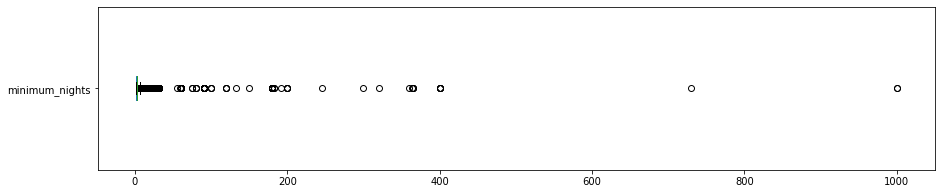

minimum_nights: valores acima de 6:
1263 entradas
6.4909%


In [39]:
# plotar boxplot para minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3));
plt.show()

# ver quantidade de valores acima de 6
print("minimum_nights: valores acima de 6:")
print("{} entradas".format(len(df[df.minimum_nights > 6])))
print("{:.4f}%".format((len(df[df.minimum_nights > 6]) / df.shape[0]) * 100))

Vemos que a quantidade de registros com a variável `minimum_nights` acima de acima de 6 dias representa 6,49% do dataset.

Agora vamos à limpeza dos *outliers*.

In [48]:
# copiar o dataframe original
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

Também vamos ver como ficaram os boxplots de `price`e `minimum_nights`

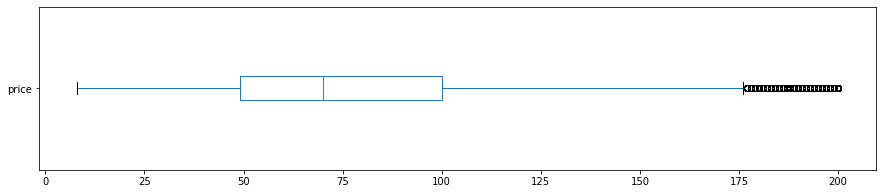

In [64]:
df_clean.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

print()

Aqui podemos ver o resultado da limpeza, apesar do boxplot identificar alguns pontos como *outliers*, esses dados estão sendo calculados segundo o novo dataset, e nossa limpeza considerou os quartis do *dataset* original.

Para garantir que não estamos lidando com *outliers* que prejudicarão nossa análise, vamos ver os novos histogramas.

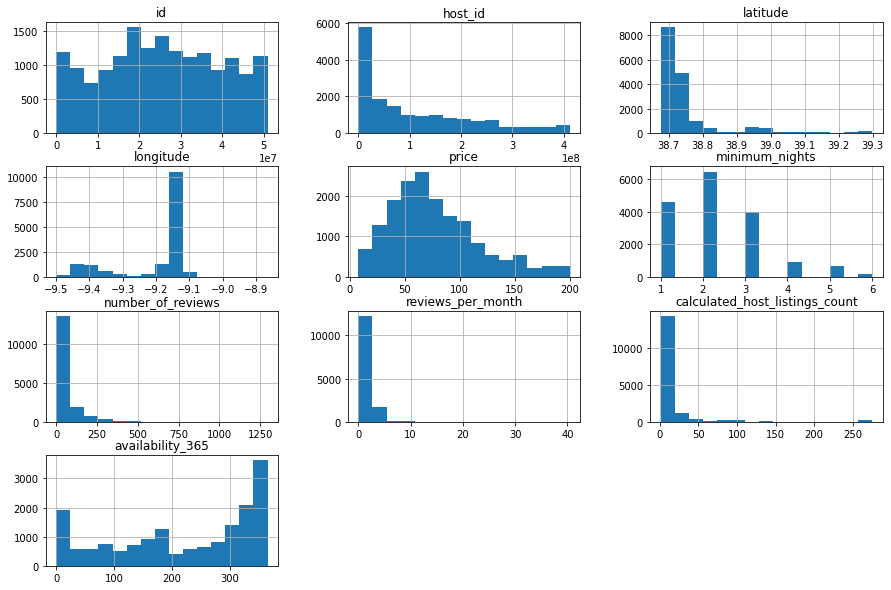

In [46]:
# verificar histogramas dos dados limpos
df_clean.hist(bins=15, figsize=(15,10));

In [49]:
# ver média de preços
df_clean[['price', 'minimum_nights', 'availability_365']].describe()

,price,minimum_nights,availability_365
count,16751.000000,16751.000000,16751.000000
mean,77.346546,2.243388,219.411378
std,40.892956,1.102581,125.062553
min,8.000000,1.000000,0.000000
25%,49.000000,1.000000,115.000000
50%,70.000000,2.000000,251.000000
75%,100.000000,3.000000,335.000000
max,200.000000,6.000000,365.000000


Após nossa limpeza, verificamos alguns pontos que merecem destaque:
* A mediana de `price` quase não foi afetada pela limpeza;
* A média e o desvio padrão de `price` foram reduzidos considerávelmente e;
* Agora não temos dados incorretos (por exemplo preço = 0)

### **Q4. Qual a correlação existente entre as variáveis**

Agora vamos verificar qual a correlação das variáveis do nosso conjunto de dados, ou seja o quanto uma variável afeta outra.

In [50]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.108719,-0.110667,-0.125217,0.089314,0.055613
minimum_nights,0.108719,1.000000,0.010436,-0.103843,-0.099009,-0.101627
number_of_reviews,-0.110667,0.010436,1.000000,0.740154,-0.096300,-0.006842
reviews_per_month,-0.125217,-0.103843,0.740154,1.000000,-0.070373,0.019796
calculated_host_listings_count,0.089314,-0.099009,-0.096300,-0.070373,1.000000,0.059078
availability_365,0.055613,-0.101627,-0.006842,0.019796,0.059078,1.000000


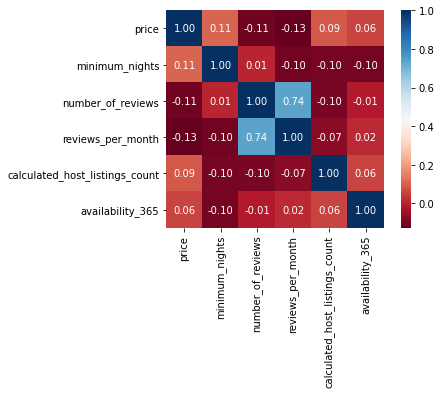

In [51]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Com exceção das variáveis `number_of_reviews` e `reviews_per_month` nossas variáveis numéricas não são relacionadas entre si.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Em nosso *dataset* a variável `room_type` indica qual o tipo do imóvel que está anunciado no Airbnb e as opções são apartamentos/casas inteiras, quarto de hotal, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vemos que em Lisboa a preferência de aluguel via Airbnb é para apartamentos/casas inteiras.

In [52]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12354
Private room        3740
Shared room          339
Hotel room           318
Name: room_type, dtype: int64

In [53]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.634906
Private room       0.192209
Shared room        0.017422
Hotel room         0.016343
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Devido a natureza do Distrito de Lisboa, iremos verificar qual dos conselhos (municípios) e quais os bairros do conselho de Lisboa são os mais caros. Começando pelos municípios:


In [55]:
# ver preços por conselho, na média
print(df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False))

# ver quantidade de imóveis em Azambuja
print('\nQuantidade de imóveis em Arruda dos Vinhos: {}'.format(df_clean[df_clean.neighbourhood_group == "Arruda Dos Vinhos"].shape[0]))

neighbourhood_group
Arruda Dos Vinhos        103.000000
Mafra                     93.668712
Cascais                   91.810617
Lourinh                   89.480969
Cadaval                   87.438596
Torres Vedras             84.756477
Sobral De Monte Agrao     83.266667
Sintra                    79.908174
Alenquer                  78.688525
Lisboa                    74.544940
Oeiras                    69.400000
Loures                    64.078261
Azambuja                  62.300000
Vila Franca De Xira       57.375000
Odivelas                  50.013889
Amadora                   40.370370
Name: price, dtype: float64

Quantidade de imóveis em Arruda dos Vinhos: 5


Vimos acima que temos apenas 5 imóveis disponíveis para aluguel em Arruda dos Vinhos, esse é um número muito pequeno o que pode provocar distorções e elevar a média do preço.

In [56]:
# ver quantidade de imóveis por conselho
df_clean.neighbourhood_group.value_counts()

Lisboa                   12183
Cascais                   1394
Sintra                     991
Mafra                      978
Lourinh                    289
Oeiras                     240
Torres Vedras              193
Loures                     115
Amadora                    108
Odivelas                    72
Alenquer                    61
Cadaval                     57
Vila Franca De Xira         40
Sobral De Monte Agrao       15
Azambuja                    10
Arruda Dos Vinhos            5
Name: neighbourhood_group, dtype: int64

Alguns municípios possuem poucos imóveis disponíveis o que pode elevar a média dos aluguéis. Se analisarmos Azambuja, por exemplo, existem apenas 5 imóveis cadastrados, enquanto que Lisboa possui mais de 13000 registros. Com essa quantidade de registros, vamos verificar também quais os 10 bairros mais caros de Lisboa.

In [57]:
# extrair média de preço do município de Lisboa por bairro
print(df_clean[df_clean.neighbourhood_group == 'Lisboa'].groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

# ver quantidade de imóveis no Parque das Naes
print('\nQuantidade de imóveis no Parque das Nações: {}'.format(df_clean[df_clean.neighbourhood == "Parque das Naes"].shape[0]))

neighbourhood
Parque das Naes      96.725389
Santa Maria Maior    80.932466
Misericrdia          80.825131
Santo Antnio         80.586027
Campo de Ourique     79.247863
Lumiar               78.075949
Estrela              75.909732
Belm                 72.917355
Campolide            72.055172
So Vicente           71.276112
Name: price, dtype: float64

Quantidade de imóveis no Parque das Nações: 193


Vemos que o Parque das Nações é o bairro mais caro para aluguel em Lisboa.

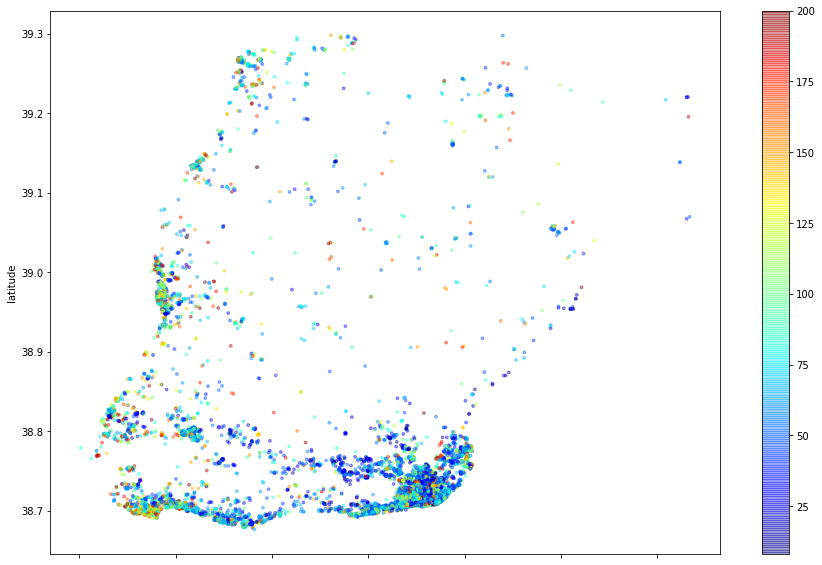

In [65]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Verificamos também que a média do número mínimo de noites é de 2 dias.

In [58]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.2433884544206317

## Conclusões

Foi realizada uma análise genérica dos dados do Airbnb para a Grande Lisboa. O objetivo principal era ter uma visão geral sobre o conjunto de dados e gerar *insights* para análises mais aprofundadas.

Notamos que algumas localidades possuem poucos imóveis disponíveis, o que pode provocar distorções na média dos preços. 

Analisando a distribuição de aluguéis por latitude e longitude, notamos que as maiores concentrações de imóveis estão localizadas nas regiões litorâneas (e banhadas pelo rio Tejo) e no centro comercial de Lisboa, essa preferência se dá, provavelmente, pelas características climáticas e de locomoção, respectivamente.

Vimos também que, em Lisboa o bairro mais caro para alugar um imóvel é o Parque das Nações, lar do Oceanário, que além de ser uma atração turística, segundo a Imobiliária Engel & Völkers “[O Parque das Nações] é atualmente um dos mais procurados para arrendamento, apresentando um preço por metro quadrado em torno dos 4.300 euros", justificando, portanto os preços mais elevados nessa localidade.


